<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Creación de una red neuronal para clasificación del conjunto de datos FASHION-MNIST

En este ejemplo veremos la creación de una red neuronal, mediante el uso de Python y la librería `keras`, para realizar una clasificación de objetos a partir del conjunto de datos [Fashion-MNITS](http://yann.lecun.com/exdb/mnist/). 

## 1. Carga de librerías y datos

In [7]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt

Descarga el conjunto de datos MNIST y realiza la partición entrenamiento / test.

In [8]:
# Descarga i división train/test
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = fashion_mnist.load_data()

Visualización de uno de los objetos para verificar, de forma visual, el tamaño, canal de color, etc.

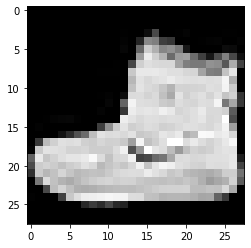

In [9]:
# Visualizamos la primera imagen del dataset
first_image = x_train_orig[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

Realizamos una conversión de formato para que las imágenes estén correctamente almacenadas en la estructura de 4 dimensiones:
- número de imagen 
- alto 
- ancho 
- canal de color (en este caso concreto, un sólo canal que corresponde a la escala de gris).

A continuación, realizamos la conversión a variable categórica de las etiquetas de las imágenes mediante la función `to_categoricaly`.

In [10]:
x_train = x_train_orig.reshape(60000,28,28,1)
x_test = x_test_orig.reshape(10000,28,28,1)

y_train = to_categorical(y_train_orig, 10)
y_test = to_categorical(y_test_orig, 10)

## 2. Creación del modelo 

A cotninuación construimos la red neuronal, que en este caso estará formada por la siguientes capas:
- Capa convolucional de 32 *kernels* de tamaño *3x3* y activación `RELU`
- Capa convolucional de 64 *kernels* de tamaño *3x3* y activación `RELU`
- Capa *Max pooling*
- Capa *Dropout* con probabilidad igual al 25%
- Capa densamente conectada con 128 neuronas y activación `RELU`
- Capa *Dropout*
- Capa de salida, formada por 10 neuronas (tenemos 10 clases en el conjunto de datos) y *softmax*

Finalment, vemos los detalles del modelo construido (para cada capa, vemos las dimensiones de salida, número de parámetros entrenables, etc.).

In [11]:
# Construcción de la red neuronal
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# Resumen de la información del modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

Realizamos el entrenamiento sobre el conjunto de *train*.

In [12]:
batch_size = 128
n_epochs = 12

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

mfit = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=n_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 94s 2ms/step - loss: 1.0824 - accuracy: 0.7516 - val_loss: 0.3653 - val_accuracy: 0.8687
Epoch 2/12
60000/60000 [==============================] - 92s 2ms/step - loss: 0.3780 - accuracy: 0.8691 - val_loss: 0.3043 - val_accuracy: 0.8909
Epoch 3/12
60000/60000 [==============================] - 91s 2ms/step - loss: 0.3181 - accuracy: 0.8877 - val_loss: 0.2899 - val_accuracy: 0.8975
Epoch 4/12
60000/60000 [==============================] - 90s 2ms/step - loss: 0.2848 - accuracy: 0.8983 - val_loss: 0.2855 - val_accuracy: 0.9041
Epoch 5/12
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2591 - accuracy: 0.9065 - val_loss: 0.2793 - val_accuracy: 0.9010
Epoch 6/12
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2449 - accuracy: 0.9136 - val_loss: 0.2730 - val_accuracy: 0.9067
Epoch 7/12
60000/60000 [==============================] - 92s 2ms/s

## 3. Evaluación del modelo

Revisamos la información disponible del entrenamiento para poder ver su evolución.

In [13]:
print(mfit.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Creamos dos gráficas:
1. La primera, donde presentamos la evolución de la *accuracy* del model durante las 12 épocas del entrenamiento, teniendo en cuenta los datos de entrenamiento y test.
2. La segunda, donde presentamos la evolución de la función de *loss* durante el entrenamiento.

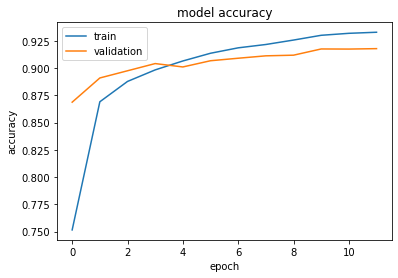

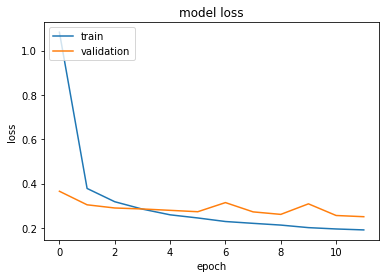

In [14]:
# Accuracy
plt.plot(mfit.history['accuracy'])
plt.plot(mfit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss
plt.plot(mfit.history['loss'])
plt.plot(mfit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Realizamos la evaluación del modelo sobre conjunto de datos de *test*.

In [16]:
# Evaluación del modelo sobre el conjunto de test
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss    :', score[0])
print('Test accuracy:', score[1])

Test loss    : 0.25054695861637594
Test accuracy: 0.9178000092506409


Mostramos, en primer lugar, el vector de predicciones para cada uno de los 4 primeros registros de test. 

Cada vector está formado por 10 números, que indican la probabilidad de este registro de pertenecer a cada una de las 10 categorías que existen en este conjunto de datos.

En segundo lugar, mostramos los valores correctos (etiquetados en el conjunto original) para estos 4 primeros registros.

In [17]:
# Predicción de las cuatro primeras imágenes del conjunto de test
print(model.predict(x_test[:4]))
y_test[:4]

[[2.7533895e-08 5.2533194e-10 1.0284823e-11 4.4791761e-12 6.6496107e-11
  2.9613602e-06 6.9355104e-09 2.3649907e-06 7.8485468e-10 9.9999464e-01]
 [1.8104934e-08 3.0958528e-17 9.9999857e-01 3.3281591e-12 3.4046306e-07
  1.4783178e-17 1.0432298e-06 1.0683738e-15 2.5647334e-12 3.1974925e-16]
 [2.0687913e-12 1.0000000e+00 1.4370547e-13 2.2101944e-13 5.1964936e-14
  8.9348222e-16 2.9202803e-12 2.3731398e-19 2.2129730e-14 1.3715950e-17]
 [8.9881893e-15 1.0000000e+00 3.5920934e-17 8.6278349e-14 4.1801928e-18
  6.2252124e-19 8.5958126e-16 8.3091050e-22 7.3796091e-18 4.5191371e-20]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)